In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [6]:
ndf.horsepower.unique()   #(horsepower 값 나열)

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [8]:
ndf.horsepower[ndf.horsepower =='?'] = np.nan
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)
ndf.horsepower = ndf.horsepower.astype('float')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [ ]:
#  [?]부분을 nan값으로 변경 (처리곤란하기때문)
# inplace =True 저장한다. dropna = nan값 데이터 제거 
# astype('float') = 'float'으로 타입 변경 
#

In [9]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state = 11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

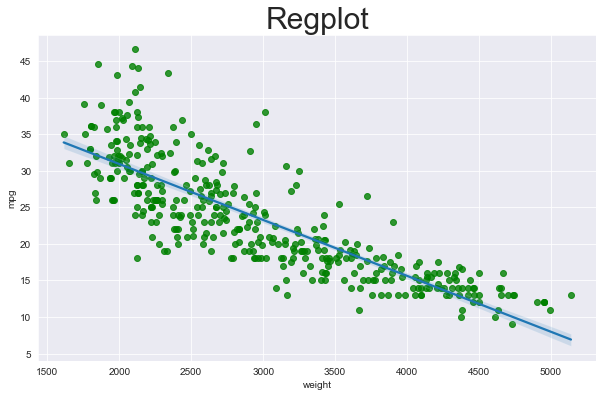

In [10]:
sns.set_style('darkgrid')

fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg',data=ndf, scatter_kws={'color':'green'})

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [12]:
print(f'기울기: { lr.coef_ }')    # lr.coef가 낮게 나온이유는 그래프의 x축과 y축의 단위가 다르기 떄문이다.

print(f'절편 :{lr.intercept_}')

기울기: [-0.00762163]
절편 :45.97121770475769


In [13]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse:{rmse}, r_square:{r_square}')

mse: 22.168955157340807, rmse:4.70839199274453, r_square:0.6410608728212728


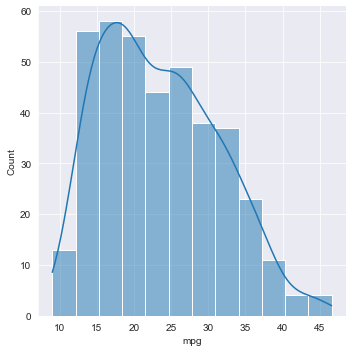

In [14]:
sns.displot(y,kde=True)

<AxesSubplot:ylabel='Density'>

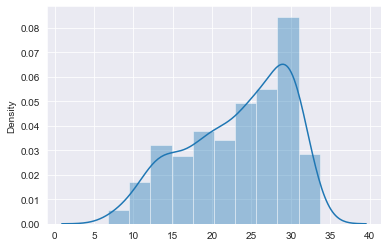

In [15]:
y_hat = lr.predict(X)
sns.distplot(y_hat, kde=True)

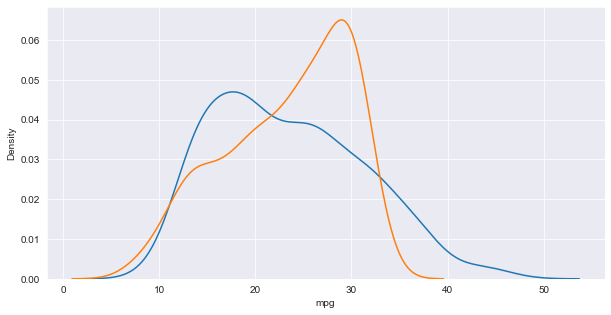

In [16]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False, label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

In [17]:
X_train.shape

(274, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [20]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [21]:
poly.get_feature_names()  # 차수 확인  2차  degree=차수

['1', 'x0', 'x0^2']

In [22]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.636847994737622

In [23]:
print(pr.coef_)        # 기울기 coef
print(pr.intercept_)    # 절편 intercept  

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723444


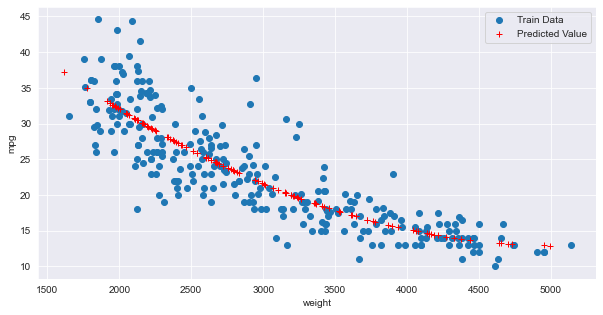

In [24]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')    #원형으로 label는 train data
ax.plot(X_test, y_hat_test,'r+',label = 'Predicted Value') # r+ 은그래프 모양
ax.legend(loc='best')   # loc는 그래프 범주 =범주를 best로 
plt.xlabel('weight')   # x축을 weight
plt.ylabel('mpg')       # y축 mpg
plt.show()
plt.close()

In [25]:
# 0 과 1사이의균일 분포
np.random.rand(100,1)

array([[2.05269690e-02],
       [4.30790707e-01],
       [6.42125377e-01],
       [1.95126366e-01],
       [2.69913716e-01],
       [8.64251739e-01],
       [5.12375744e-01],
       [5.47279654e-01],
       [3.57699368e-02],
       [5.88281808e-01],
       [9.44503736e-01],
       [7.88812434e-01],
       [1.24462804e-01],
       [4.60826115e-01],
       [4.43527072e-02],
       [7.22463131e-01],
       [2.15010530e-01],
       [9.87349453e-01],
       [5.09010643e-01],
       [5.99303405e-01],
       [6.20773627e-01],
       [7.72572774e-01],
       [3.32883611e-01],
       [8.81456509e-01],
       [4.46583281e-02],
       [1.34317030e-02],
       [6.47870551e-01],
       [7.99233829e-01],
       [5.95504616e-01],
       [9.16312194e-01],
       [8.35906757e-01],
       [9.20091126e-01],
       [6.58861046e-01],
       [7.78484246e-01],
       [4.91668288e-01],
       [6.87306509e-01],
       [8.88581955e-02],
       [5.18847718e-01],
       [2.34965733e-01],
       [1.51306238e-01],


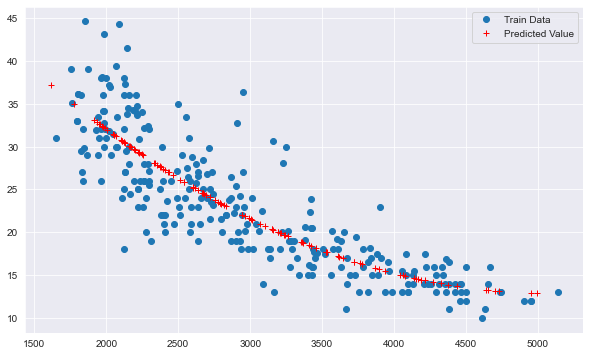

In [26]:
# [과제] X데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)
## 2차 다항식으로 변환  degree=3 하면 3차다항식으로 변환 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# fit 학습 데이터
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)


# 그래프
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train, 'o',label='Train Data')
ax.plot(X_test,y_preds, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

In [27]:
X

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
393,2790
394,2130
395,2295
396,2625


In [28]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [29]:
import numpy as np
np.random.seed(42)
m =100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

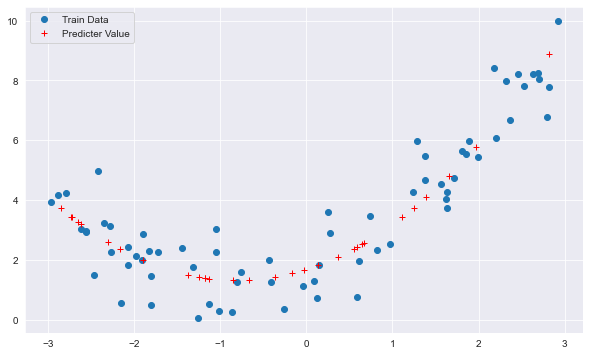

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds, 'r+', label='Predicter Value')
ax.legend(loc='best')
plt.show()
plt.close()

In [31]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [32]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [33]:
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [34]:
print(f'기울기: { lr.coef_}')
print(f'절편: {lr.intercept_}')

기울기: [-0.60691288 -0.03714088 -0.00522268]
절편: 46.414351269634025


In [35]:
# 오차 행렬 수작업 계산
TN = 105;FP = 13; FN=14; TP=47;
accuracy = round((TP+TN) / (TP + TN + FP + FN),4)
precision = round((TP) / (TP+FN),4)
recall = round((TP) / (TP+FN),4)
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:',recall)
print('f1 score:', 2*(precision*recall) / (precision+recall))

accuracy: 0.8492
precision: 0.7705
recall: 0.7705
f1 score: 0.7705


In [36]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print(f'오차행렬: {confusion} \n')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율 : {round(recall,4)}')

In [37]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



def fillnas(df):
    def callname(x):
        m = re.compile('[A-Za-z]+[.]')
        p = re.findall(m,x)
        return p[0]
    
    df['Callname']=df.Name.apply(lambda x:callname(x))
    
    df1 = df.loc[df.Age.isnull()]
    age_nulllist = list(set(df1.Callname.values.tolist()))
    
    df2 = df.loc[df.Age.notnull()]
    pivot = pd.pivot_table(df2, index = 'Callname', values = 'Age',aggfunc = 'mean')
    
    for age in age_nulllist:
        df.loc[(df.Age.isnull())&(df.Callname == age),['Age']]=(pivot.loc[age][0])
        
    df['Embarked'].fillna(method = 'ffill',inplace=True)
    
    df3 = df.loc[df.Cabin.notnull()]

    df3['Cabins'] = df3['Cabin'].str[:1]
    df4 = df.loc[df.Cabin.isnull()]
    
    for i in range(1,4):
        df33 = df3.loc[df3.Pclass == i]
        cabin_fill_list=list(set(df33.Cabins.values.tolist()))
        df44 = df4.loc[df4.Pclass == i]
        fill_index = list(df44.index)
        for index in fill_index:
            df.loc[index,'Cabin'] = np.random.choice(cabin_fill_list)
            
    return df

# 불필요 항목 제거
def drop_feat(df):
    df.drop(['PassengerId','Name','Ticket','Callname'],axis=1,inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    scaler = MinMaxScaler()
    scaler.fit(df[['Fare']])
    fare_scaled = scaler.transform(df[['Fare']])
    df['Fare'] = fare_scaled
    
    return df

def transform_features(df):
    df = fillnas(df)
    df = drop_feat(df)
    df = format_features(df)
    return df

In [38]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

t_df = pd.read_csv('./dataset/train.csv')
y_t_df = t_df['Survived']
X_t_df = t_df.drop('Survived',axis=1)
X_t_df = transform_features(X_t_df)
X_t_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,0.014151,6,2
1,1,0,38.0,1,0,0.139136,2,0
2,3,0,26.0,0,0,0.015469,4,2
3,1,0,35.0,1,0,0.103644,2,2
4,3,1,35.0,0,0,0.015713,5,2


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test,y_train,y_test = train_test_split(X_t_df,y_t_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬: [[105  13]
 [ 14  47]] 

정확도: 0.8492, 정밀도: 0.7833, 재현율 : 0.7705


In [40]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)], axis=1)
pred_proba_result[:3]

array([[0.56265145, 0.43734855, 0.        ],
       [0.88200101, 0.11799899, 0.        ],
       [0.87373542, 0.12626458, 0.        ]])

In [41]:
from sklearn.preprocessing import Binarizer
X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [42]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test,custom_predict)

오차행렬: [[105  13]
 [ 14  47]] 

정확도: 0.8492, 정밀도: 0.7833, 재현율 : 0.7705


In [43]:
custom_threshold = 0.4

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test,custom_predict)

오차행렬: [[99 19]
 [11 50]] 

정확도: 0.8324, 정밀도: 0.7246, 재현율 : 0.8197


In [44]:
custom_threshold = 0.45

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test,custom_predict)

오차행렬: [[101  17]
 [ 14  47]] 

정확도: 0.8268, 정밀도: 0.7344, 재현율 : 0.7705


In [45]:
custom_threshold_list = [0.4, 0.45, 0.50, 0.55, 0.60]

for i in custom_threshold_list:
    binarizer = Binarizer(threshold=i).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print('임계값:',i)
    
    result = get_clf_eval (y_test, custom_predict)
    
print(result)

임계값: 0.4
오차행렬: [[99 19]
 [11 50]] 

정확도: 0.8324, 정밀도: 0.7246, 재현율 : 0.8197
임계값: 0.45
오차행렬: [[101  17]
 [ 14  47]] 

정확도: 0.8268, 정밀도: 0.7344, 재현율 : 0.7705
임계값: 0.5
오차행렬: [[105  13]
 [ 14  47]] 

정확도: 0.8492, 정밀도: 0.7833, 재현율 : 0.7705
임계값: 0.55
오차행렬: [[109   9]
 [ 15  46]] 

정확도: 0.8659, 정밀도: 0.8364, 재현율 : 0.7541
임계값: 0.6
오차행렬: [[114   4]
 [ 17  44]] 

정확도: 0.8827, 정밀도: 0.9167, 재현율 : 0.7213
None


In [46]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print(f'f1 score: { round(f1,4)}')

f1 score: 0.7769


In [47]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(f'오차행렬: {confusion}\n')
    print(f'정확도 : {round(accuracy,4)}, 정밀도:{round(precision,4)},재현율:{round(recall,4)}, f1_score:{round(f1,4)}')

In [48]:
get_clf_eval(y_test,pred)

오차행렬: [[105  13]
 [ 14  47]]

정확도 : 0.8492, 정밀도:0.7833,재현율:0.7705, f1_score:0.7769


In [50]:
lr_clf.predict_proba(X_test)[:,1]

array([0.43734855, 0.11799899, 0.12626458, 0.1453748 , 0.16954413,
       0.12679266, 0.10834531, 0.80476614, 0.23818936, 0.66968068,
       0.11743308, 0.12188555, 0.1262689 , 0.10837689, 0.52698559,
       0.12676099, 0.08152129, 0.29370129, 0.24922402, 0.83132517,
       0.29156246, 0.35928201, 0.13091332, 0.2004664 , 0.09071342,
       0.25896107, 0.13988714, 0.07216655, 0.33082274, 0.27793175,
       0.92868077, 0.78928227, 0.13549548, 0.82718999, 0.37607436,
       0.25896107, 0.07607035, 0.5960018 , 0.05430448, 0.1096729 ,
       0.36413263, 0.07426106, 0.79365945, 0.70560145, 0.69494533,
       0.67333567, 0.90912394, 0.3256333 , 0.9439153 , 0.10865552,
       0.55709299, 0.0904963 , 0.14152232, 0.74094935, 0.34103372,
       0.17453076, 0.20241993, 0.10578357, 0.16519968, 0.45472355,
       0.30883565, 0.08870904, 0.50510663, 0.59069212, 0.4273277 ,
       0.09083521, 0.65520539, 0.57790886, 0.94839992, 0.14660959,
       0.11526208, 0.15314404, 0.10027702, 0.94341862, 0.20122

137


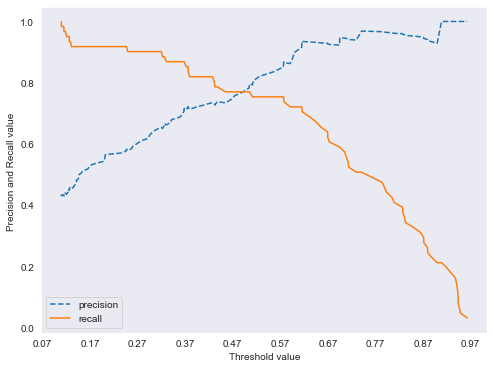

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
   
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    print(threshold_boundary)
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')     
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value ')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [51]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_proba_c1 = lr_clf.predict_proba(X_test)[:1]

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    
    plt.plot(fprs, tprs,label = 'ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None,\
                               names=['column_index','column_name'])

print(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/human_activity/features.txt'

In [ ]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None,\
                               names=['column_index','column_name'])


    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt', sep='\s+', header = None, names=['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])
    
    return X_train, X_test, y_train,y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X_train, X_test, y_train, y_test = get_human_dataset()
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(f'rf 정확도: {accuracy:.3f}')

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100],
    'max_depth':[6,8,10,14],
    'min_samples_leaf':[8,14,16],
    'min_samples_split':[8,14,20]
}
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

#print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
#print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(f'최적 하이퍼 파라미터: \n {grid_cv.best_params_}')
print(f'최고 에측 정확도: \n {grid_cv.best_score_}')

# rf로 객체 생성후 GridSearchCV 수행

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print(f'예측정확도 : \n {accuracy_score(y_test,pred)}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances  Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()
